# Tutkitaan datasettien ominaisuuksia

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


## Ladataan datat

In [4]:
COMPANIES = pd \
        .read_csv('data/prod_data_companies_2021_08_22.csv',
                  delimiter='\t',
                  na_values='(null)',
                  dtype={
                      'business_id': 'string',
                      'company_name': 'string',
                      'company_form': 'string',
                      'company_form_code': 'string',
                      'location_region': 'string',
                      'location_region_code': 'string',
                      'location_municipality': 'string',
                      'location_municipality_code': 'string',
                      'industry_code': 'string',
                      'company_status': 'string',
                      'company_status_code': 'string',
                      'personnel_class': 'string'
                  }
                  )

INTERACTIONS = pd \
    .read_csv('data/interactions_2021_08_19.csv',
             delimiter='\t',
             dtype={
                 'group_id': 'string',
                 'business_id': 'string',
                 'owner': 'string'
             })

## Uniikkien käyttäjien, ryhmien ja yritysten määrät interaktioissa

In [13]:
print('Unique users: {}'.format(INTERACTIONS['owner'].unique().shape[0]))
print('Unique groups: {}'.format(INTERACTIONS['group_id'].unique().shape[0]))
print('Unique companies: {}'.format(INTERACTIONS['business_id'].unique().shape[0]))

Unique users: 344
Unique groups: 1403
Unique companies: 151321


## Ryhmien keskimääräinen koko/kokojakauma

Group size mean: 390.73
Group size median: 58.00
Group size mode: 1


(array([1092.,  124.,   49.,   32.,   22.,   17.,   17.,    9.,   11.,
          30.]),
 array([1.0, 400.8, 800.6, 1200.4, 1600.2, 2000.0, 2399.8, 2799.6, 3199.4,
        3599.2000000000003, 3999.0], dtype=object),
 <BarContainer object of 10 artists>)

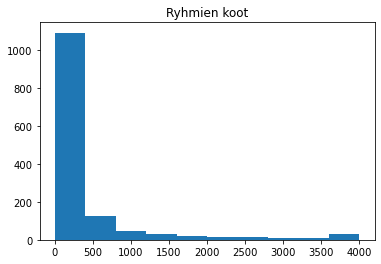

In [55]:
group_sizes = INTERACTIONS['group_id'].value_counts()

print('Group size mean: {mean:.2f}'.format(mean=group_sizes.mean()))
print('Group size median: {median:.2f}'.format(median=group_sizes.median()))
print('Group size mode: {mode}'.format(mode=group_sizes.mode()[0]))

plt.figure()
plt.title('Ryhmien koot')
plt.hist(group_sizes)


## Ryhmäkokojen tunnusluvut, group_size >= 10

Group size mean: 531.87
Group size median: 154.50
Group size mode: 10


(array([720., 121.,  49.,  34.,  20.,  18.,  16.,   9.,  11.,  30.]),
 array([10.0, 408.9, 807.8, 1206.6999999999998, 1605.6, 2004.5,
        2403.3999999999996, 2802.2999999999997, 3201.2, 3600.1, 3999.0],
       dtype=object),
 <BarContainer object of 10 artists>)

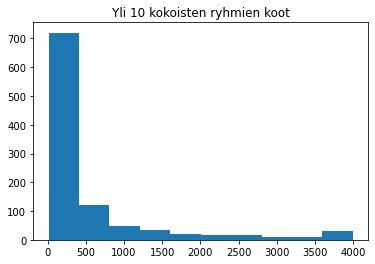

In [61]:
group_sizes_tmp = INTERACTIONS['group_id'].value_counts()
group_sizes = group_sizes_tmp[group_sizes_tmp >= 10]

print('Group size mean: {mean:.2f}'.format(mean=group_sizes.mean()))
print('Group size median: {median:.2f}'.format(median=group_sizes.median()))
print('Group size mode: {mode}'.format(mode=group_sizes.mode()[0]))

plt.figure()
plt.title('Yli 10 kokoisten ryhmien koot')
plt.hist(group_sizes)

In [ ]:
Seuraavaksi uniikit luvut group_size > 10 ryhmillä!

## Opit

- Ryhmän kokojakauman perusteella pitäisi varmaan pudottaa 1:n kokoiset ryhmät pois...


## Avoimia kysymyksiä

- Mikä on sopiva minimikoko mukaanotettavalle ryhmälle?
- Mikä on sopiva minimikoko 